# Algo


In [ ]:
! pip install pythtb

(<Figure size 640x640 with 1 Axes>, <Axes: >)

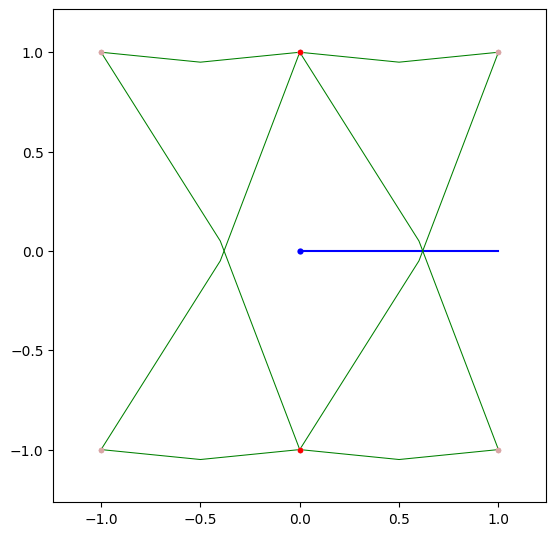

In [1]:
from pythtb import *
from pylab import *

# Cadena de Kitaev

lat=[[1.0,0.0],[0.0,1.0]]
orb=[[0.0,-1.0],[0.,1.0]]

t = 1
Δ = 0.5
Nμ=500
KitaevChain=[]
M=np.linspace(-3*t, 3*t, num=Nμ)
for μ in M:
  KC=tb_model(1,2,lat,orb,per=[0])
  KC.set_hop(-t,0,0,[1,0]) # [1] : significa e^{i([1].a1)(k)}
  KC.set_hop(t,1,1,[1,0])
  KC.set_hop(-Δ,0,1,[1,0])
  KC.set_hop( Δ,0,1,[-1,0])
  KC.set_onsite([-μ,μ])
  KitaevChain.append(KC)

KitaevChain[1].visualize(0,1)

# Texto


 Path in 1D BZ defined by nodes at [-0.5  0.   0.5]

 Path in 1D BZ defined by nodes at [-0.5  0.   0.5]

 Path in 1D BZ defined by nodes at [-0.5  0.   0.5]

 Path in 1D BZ defined by nodes at [-0.5  0.   0.5]

 Path in 1D BZ defined by nodes at [-0.5  0.   0.5]

 Path in 1D BZ defined by nodes at [-0.5  0.   0.5]

 Path in 1D BZ defined by nodes at [-0.5  0.   0.5]

 Path in 1D BZ defined by nodes at [-0.5  0.   0.5]

 Path in 1D BZ defined by nodes at [-0.5  0.   0.5]

 Path in 1D BZ defined by nodes at [-0.5  0.   0.5]

 Path in 1D BZ defined by nodes at [-0.5  0.   0.5]

 Path in 1D BZ defined by nodes at [-0.5  0.   0.5]

 Path in 1D BZ defined by nodes at [-0.5  0.   0.5]

 Path in 1D BZ defined by nodes at [-0.5  0.   0.5]

 Path in 1D BZ defined by nodes at [-0.5  0.   0.5]

 Path in 1D BZ defined by nodes at [-0.5  0.   0.5]

 Path in 1D BZ defined by nodes at [-0.5  0.   0.5]

 Path in 1D BZ defined by nodes at [-0.5  0.   0.5]

 Path in 1D BZ defined by nodes at [-0.5  0.  

C:\Users\gozu0\AppData\Local\Temp\ipykernel_33196\3543440413.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(figsize=(5, 4))


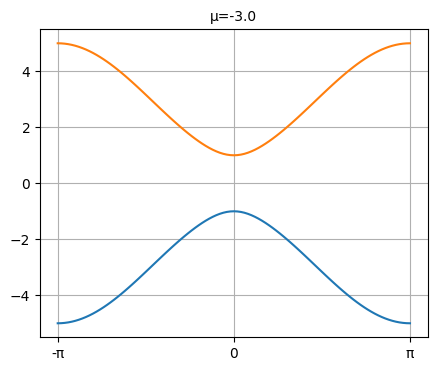

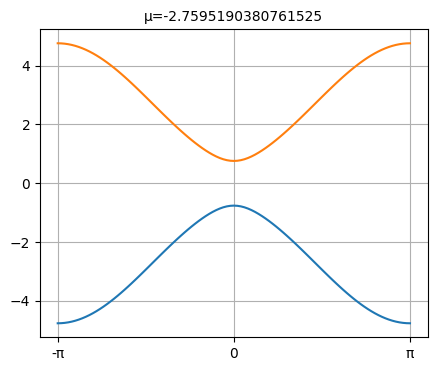

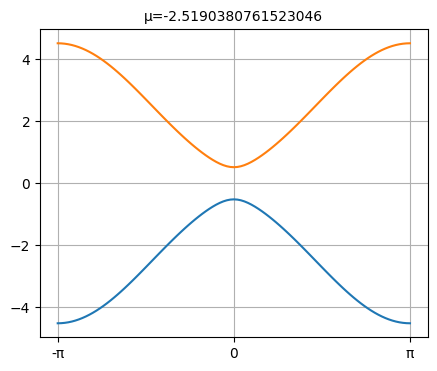

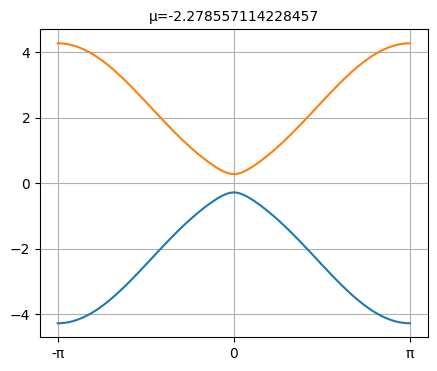

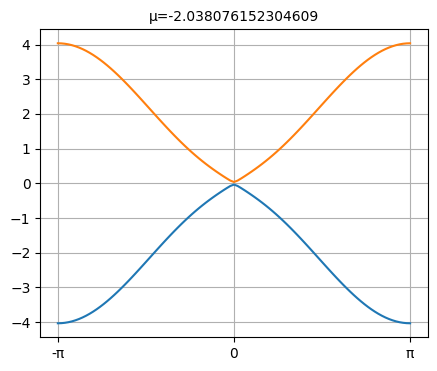

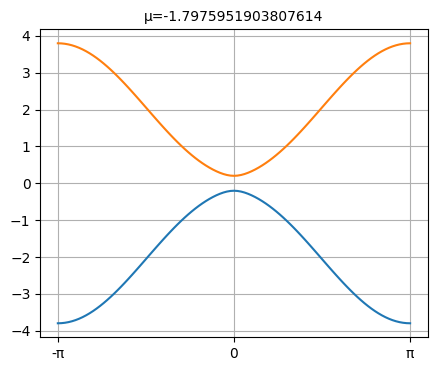

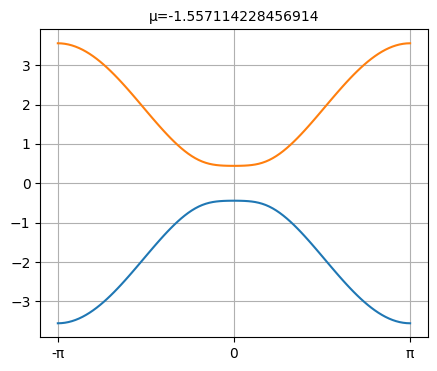

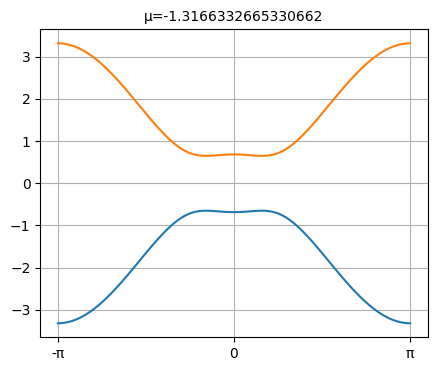

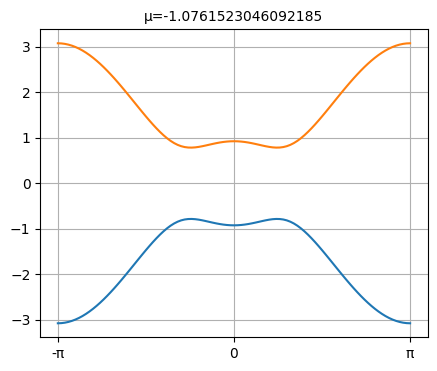

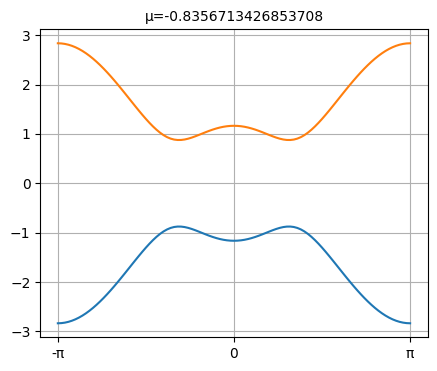

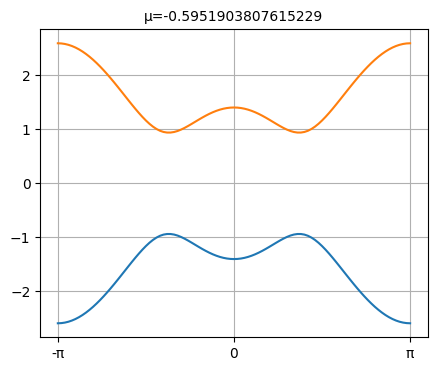

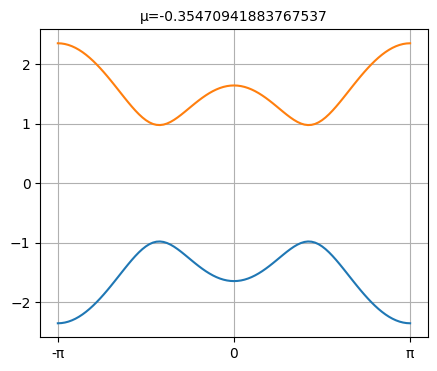

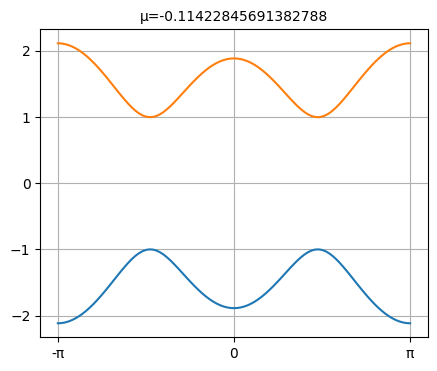

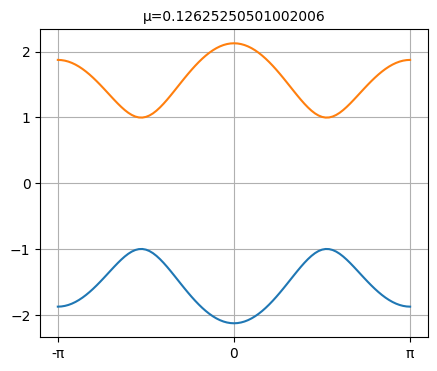

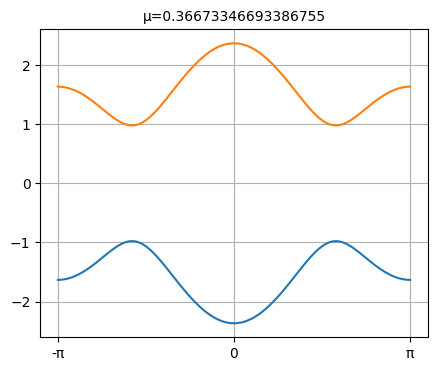

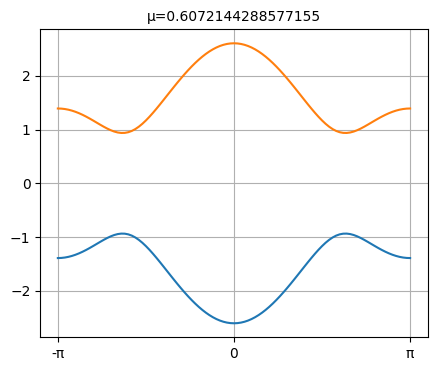

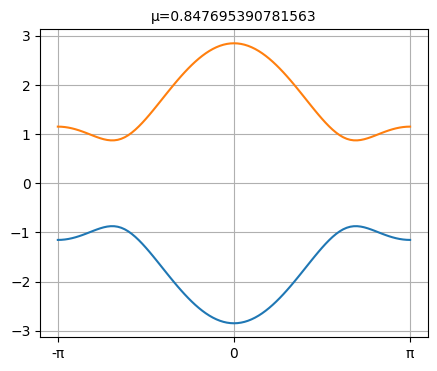

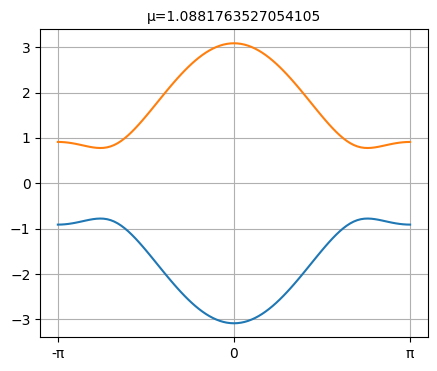

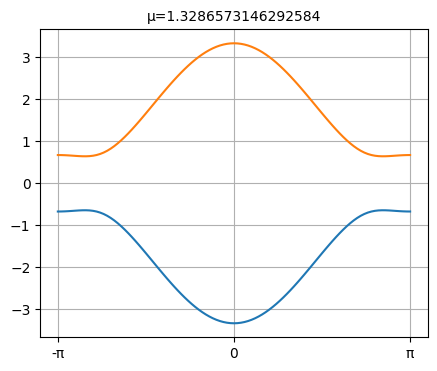

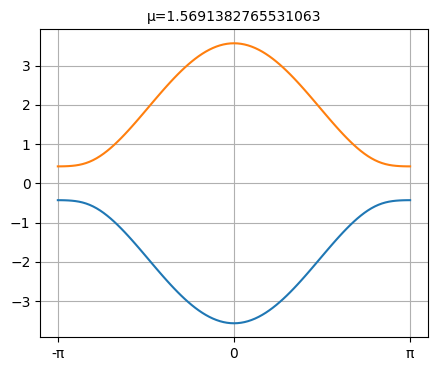

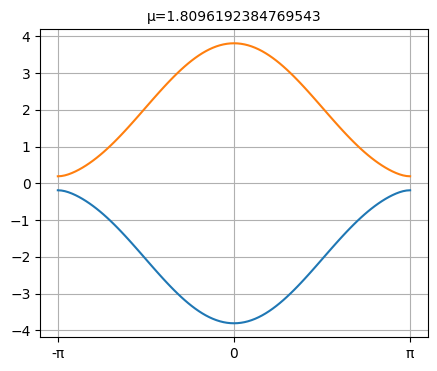

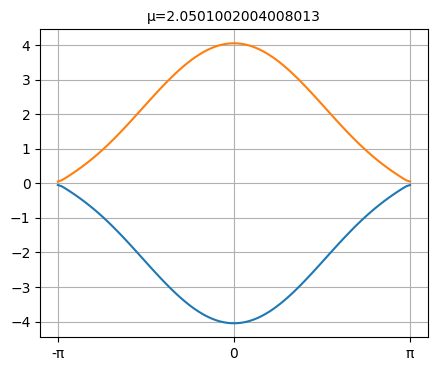

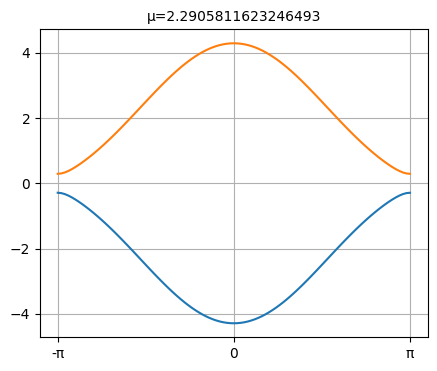

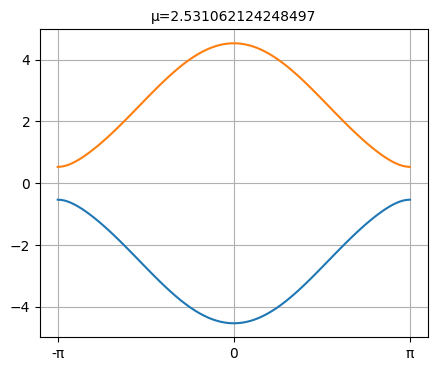

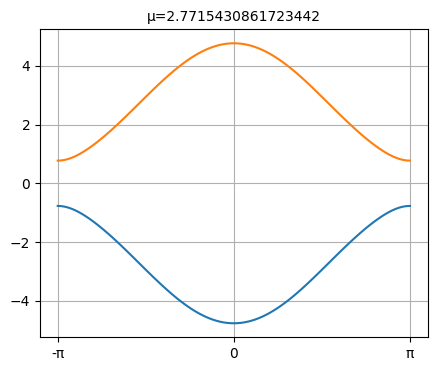

In [2]:
Xm = [-0.5]
Xp = [ 0.5]
puntosK = [Xm,[0],Xp]
Ek=[]
for i in range(Nμ):
  kpts, kdist, knode = KitaevChain[i].k_path(puntosK,101,report=True)
  Ek.append(KitaevChain[i].solve_all(kpts,eig_vectors=False))
for i in range(0,Nμ,20):
  fig,ax=plt.subplots(figsize=(5, 4))
  ax.plot(kdist,Ek[i].T)
  ax.set_xticks(knode)
  ax.set_title("μ="+str(M[i]),fontsize=10)
  ax.grid(True)
  ax.set_xticklabels(["-π",0,"π"])

In [3]:
def Zak_Ph(model):
  Nk=500
  ptsK=[[0.],[1.]] # Debe ser la 1ZB
  kpts, kdist, knode = model.k_path(ptsK,Nk,report=False)
  ϵk,evec=model.solve_all(kpts,eig_vectors=True)
  Zak=[]
  for band in range(len(evec)):
    eveb=evec[band]
    Prod=prod([ np.vdot(eveb[i-1],eveb[i]) for i in range(1,Nk)])
    Zak.append(-imag( np.log(Prod) ))
  return Zak

In [4]:
PhZak=list(map(Zak_Ph,KitaevChain))
PhZak=np.array(PhZak)

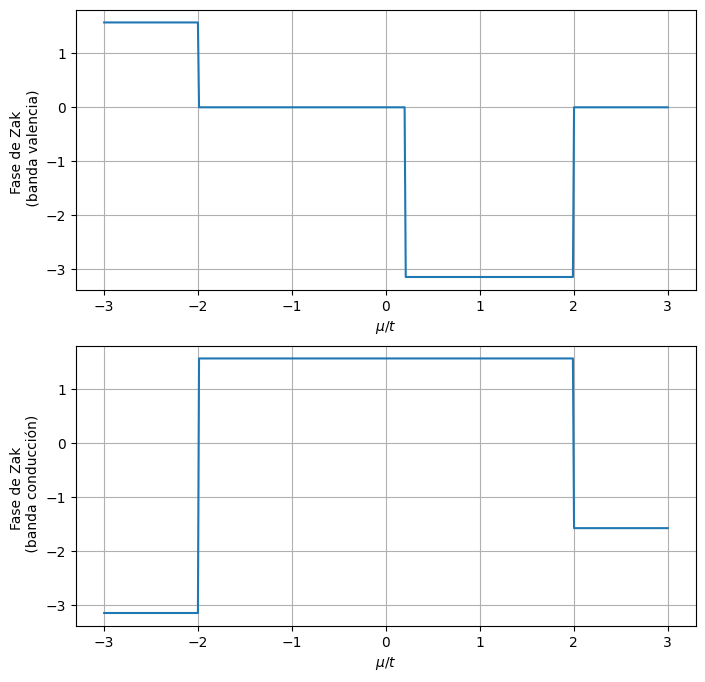

In [5]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(8, 8))

ax1.plot(M,PhZak.T[0])
ax1.set_xlabel('$\mu/t$')
ax1.set_ylabel('Fase de Zak \n (banda valencia)')
ax1.grid(True)

ax2.plot(M,PhZak.T[1])
ax2.set_xlabel('$\mu/t$')
ax2.set_ylabel('Fase de Zak \n (banda conducción)')
ax2.grid(True)
ax2.grid(True)